In [1]:
import pickle
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np

In [7]:
with open('RGBA_flags.pkl', 'rb') as f:
    flags = pickle.load(f)

with open('dataset.pkl', 'rb') as f:
    data = pickle.load(f)

In [73]:
from scipy.stats import mode

def get_RGB_mode(flags):
    flags = [flags[:,:,:3] for flags in flags]
    most_color = []
    for i in range(np.size(flags)):
        flatten = [e for sl in flags[i] for e in sl]
        a = mode(flatten, axis=0)[0][0]
        most_color.append(a)
    return most_color

In [ ]:
most_color = np.array(get_RGB_mode(flags))
continents = [int(x.replace(',', '')) for x in data[:, 1]]
populations = [int(x.replace(',', '')) for x in data[:, 2]]
wavelengths = [int(x.split('.')[0]) for x in data[:, 3]]

C:\Users\Fabio\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


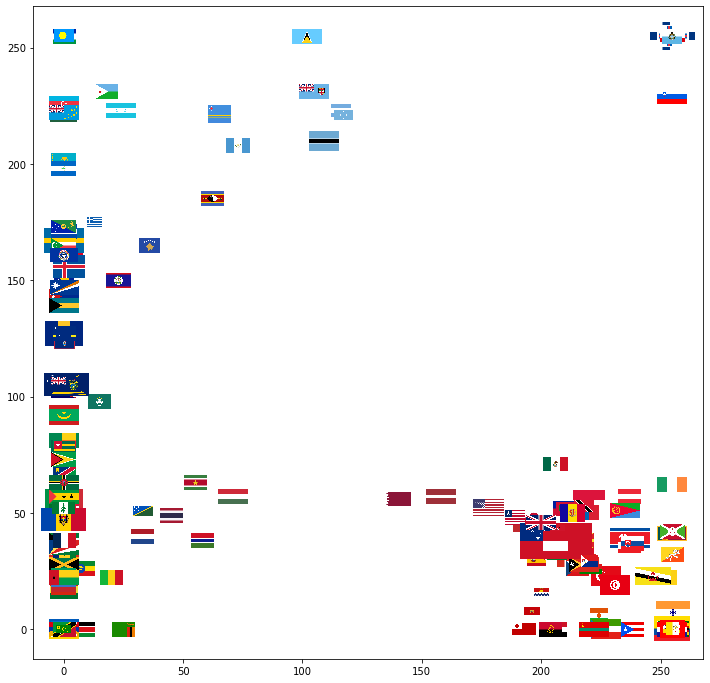

In [115]:
def scatter_flags(Xs, Ys, ims, ax=None, zoom=1):
    artists = []
    for X, Y, im in zip(Xs, Ys, ims):
        offim = OffsetImage(np.swapaxes(im, 0, 1), zoom=zoom)
        ab = AnnotationBbox(offim, (X, Y), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([Xs, Ys]))
    ax.autoscale()
    return artists

fig, ax = plt.subplots(figsize=(12, 12))
#scatter_flags(most_color[:, 2], populations, flags, ax=ax, zoom=0.025)
scatter_flags(most_color[:, 0], most_color[:, 2], flags, ax=ax, zoom=0.025)
#scatter_flags(np.mean(most_color,axis=1), populations, flags, ax=ax, zoom=0.025)
#plt.yscale('log')
#plt.savefig('flag_plot.png', dpi=500)
plt.show()

22
16


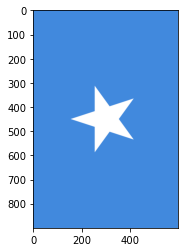

In [87]:
flags = [flags[:, :, :3] for flags in flags]
plt.imshow(flags[71])
flags[1].shape[0]
print(flags[119].shape[0])
print(flags[119].shape[1])

In [141]:
xmax = []
for flag in flags:
    flatten = np.array([e for sl in flag for e in sl])
    rgb = np.mean(flatten, axis=0) / 255

    gaussian = lambda x, mean, std: np.exp(-(x - mean)**2 / (2*std**2)) / np.sqrt(2*np.pi*std**2)
    xlin = np.linspace(0, 40, 1000)

    #normal curves
    ylin = np.zeros(len(xlin))
    for i in range(3):
        std = 4/np.sqrt(rgb[i]+1e-10)
        gaussian_ = lambda x: gaussian(x, 10*(i+1), std)
        ylin += gaussian_(xlin)

    #plot this shii
    #plt.plot(xlin, ylin)
    xmax.append(xlin[np.argmax(ylin)])

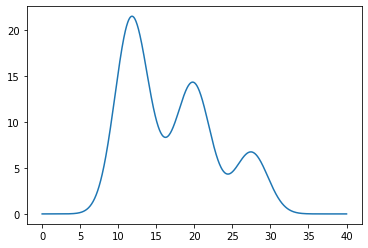

In [143]:
gaussian = lambda x, mean, std: np.exp(-(x - mean)**2 / (2*std**2)) / np.sqrt(2*np.pi*std**2)
xlin = np.linspace(0, 40, 1000)

#normal curves
ylin = np.zeros(len(xlin))
for xm in xmax:
    std = 2
    gaussian_ = lambda x: gaussian(x, xm, std)
    ylin += gaussian_(xlin)

plt.plot(xlin, ylin)

In [146]:
xmax = []
for mc in most_color:

    gaussian = lambda x, mean, std: np.exp(-(x - mean)**2 / (2*std**2)) / np.sqrt(2*np.pi*std**2)
    xlin = np.linspace(0, 40, 1000)

    #normal curves
    ylin = np.zeros(len(xlin))
    for i in range(3):
        std = 4/np.sqrt(mc[i]/255+1e-10)
        gaussian_ = lambda x: gaussian(x, 10*(i+1), std)
        ylin += gaussian_(xlin)

    #plot this shii
    #plt.plot(xlin, ylin)
    xmax.append(xlin[np.argmax(ylin)])

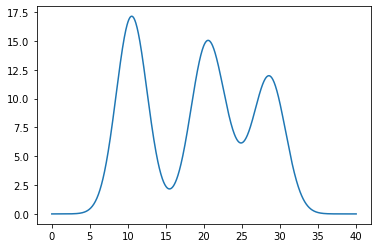

In [147]:
gaussian = lambda x, mean, std: np.exp(-(x - mean)**2 / (2*std**2)) / np.sqrt(2*np.pi*std**2)
xlin = np.linspace(0, 40, 1000)

#normal curves
ylin = np.zeros(len(xlin))
for xm in xmax:
    std = 2
    gaussian_ = lambda x: gaussian(x, xm, std)
    ylin += gaussian_(xlin)

plt.plot(xlin, ylin)